# I. Generate all lattice walks, 2D square lattice

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Генерируются все возможные цепочки с повторениями 

In [2]:
steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def generate_walks2(path, L, cache):
    if L == 0:
        cache.append(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            xy_new = (x + dx, y + dy)
            pp = path.copy()
            pp.append(xy_new)
            generate_walks2(pp, L - 1, cache)

## Task 0

Функции для рассчёта средней длины и координат вектора

In [9]:
def calc(cache):
    dd=0
    for i in range(0, len(cache)):
        dd+=math.sqrt(((cache[i][0][0])-(cache[i][-1][0]))**2+((cache[i][0][1])-(cache[i][-1][1]))**2)
    return dd/len(cache)

In [4]:
def coord(cache):
    dd=0
    x=0
    y=0
    for i in range(0, len(cache)):
        x+=cache[i][0][0]-cache[i][-1][0] 
        y+=cache[i][0][1] - cache[i][-1][1]        
    return (x/len(cache),y/len(cache))#(0-xy[0],0-xy[1])

# I. Generate all SAWs on a 2D square lattice

Генерируются все возможные цепочки без повторений

In [5]:
def generate_SAWs(path, L, cache):
    #from IPython.core.debugger import Tracer; Tracer()() 
    if L == 0:
        cache.append(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            xy_new = (x + dx, y + dy)
            pp = path.copy()
            if pp.count(xy_new)<1:
                pp.append(xy_new)
                generate_SAWs(pp, L - 1, cache)

Выводим всю нужную информацию по обоим вариантам цепочек

In [10]:
m=10
print("Для цепочек с повторениями")
Y1=np.zeros(m-1)
for l in range(1,m):
    cache = []
    generate_walks2([(0, 0)], l, cache)
    leng=calc(cache)
    Y1[l-1]=leng
    cor=coord(cache)
    print(f"Средние координаты вектора: {cor}, его средняя длина {leng}, длина блуждания {l} и кол-во блужданий {len(cache)}")

Для цепочек с повторениями
Средние координаты вектора: (0.0, 0.0), его средняя длина 1.0, длина блуждания 1 и кол-во блужданий 4
Средние координаты вектора: (0.0, 0.0), его средняя длина 1.2071067811865477, длина блуждания 2 и кол-во блужданий 16
Средние координаты вектора: (0.0, 0.0), его средняя длина 1.5885254915624203, длина блуждания 3 и кол-во блужданий 64
Средние координаты вектора: (0.0, 0.0), его средняя длина 1.7532798363559174, длина блуждания 4 и кол-во блужданий 256
Средние координаты вектора: (0.0, 0.0), его средняя длина 2.0193315606071582, длина блуждания 5 и кол-во блужданий 1024
Средние координаты вектора: (0.0, 0.0), его средняя длина 2.1612211221359865, длина блуждания 6 и кол-во блужданий 4096
Средние координаты вектора: (0.0, 0.0), его средняя длина 2.374821460732043, длина блуждания 7 и кол-во блужданий 16384
Средние координаты вектора: (0.0, 0.0), его средняя длина 2.5017070926792733, длина блуждания 8 и кол-во блужданий 65536
Средние координаты вектора: (0.0, 0

In [11]:
print("Для цепочек без повторений")
Y=np.zeros(m-1)
for l in range(1,m):
    cache = []
    generate_SAWs([(0, 0)], l, cache)
    leng=calc(cache)
    Y[l-1]=leng
    cor=coord(cache)
    print(f"Средние координаты вектора: {cor}, его средняя длина {leng}, длина блуждания {l} и кол-во блужданий {len(cache)}")

Для цепочек без повторений
Средние координаты вектора: (0.0, 0.0), его средняя длина 1.0, длина блуждания 1 и кол-во блужданий 4
Средние координаты вектора: (0.0, 0.0), его средняя длина 1.6094757082487303, длина блуждания 2 и кол-во блужданий 12
Средние координаты вектора: (0.0, 0.0), его средняя длина 2.046267540555414, длина блуждания 3 и кол-во блужданий 36
Средние координаты вектора: (0.0, 0.0), его средняя длина 2.5570255311726613, длина блуждания 4 и кол-во блужданий 100
Средние координаты вектора: (0.0, 0.0), его средняя длина 2.9512053136683383, длина блуждания 5 и кол-во блужданий 284
Средние координаты вектора: (0.0, 0.0), его средняя длина 3.3905293993647274, длина блуждания 6 и кол-во блужданий 780
Средние координаты вектора: (0.0, 0.0), его средняя длина 3.7476893934881423, длина блуждания 7 и кол-во блужданий 2172
Средние координаты вектора: (0.0, 0.0), его средняя длина 4.149885562855251, длина блуждания 8 и кол-во блужданий 5916
Средние координаты вектора: (0.0, 0.0), 

Строим графики зависимости средней длины от кол-ва шагов

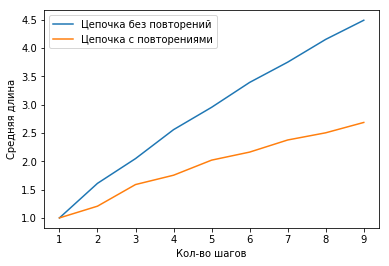

In [12]:
X=np.arange(1,10)
plt.plot(X,Y, label = 'Цепочка без повторений')
plt.plot(X,Y1, label = 'Цепочка с повторениями')
plt.xlabel("Кол-во шагов")
plt.ylabel("Средняя длина")
plt.legend()